# Pandas: Exploratory Data Analysis

*Author: Evan Carey*

*Copyright 2017-2019, BH Analytics, LLC*

## Overview

The purpose of this section is to demonstrate how to perform univariate and bivariate exploratory data analysis with pandas and seaborn. 

We will also discuss group-by analysis and pivot table functionality. 

## Data for this Session: Healthcare Visits

To demonstrate these concepts, we will use some simulated data from a health care system. There are two files we will use throughout this section. 

*  The first file is called `Patient.csv`, and is information about patients in the healthcare system. There should be one row per patient in this file, so we call this a patient level file. 

*  The second file is called `Staff.csv`, and is information about staff. There should be one row per staff member in this file, so we call this a staff level file.

* The final file is called `OutpatientVisit.csv`. This file contains one record for every outpatient visit in the dataset, with the PatientID indicated (among other things). 

The files are located here: 

* Data/Data_Sims/healthcare/Patient.csv
* Data/Data_Sims/healthcare/Staff.csv
* Data/Data_Sims/healthcare/OutpatientVisit.csv

## Libraries

In [1]:
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import textwrap

In [2]:
## Enable inline plotting for graphics
%matplotlib inline

In [3]:
## Get Version information
print(textwrap.fill(sys.version),'\n')
print("Pandas version: {0}".format(pd.__version__),'\n')
print("Matplotlib version: {0}".format(matplotlib.__version__),'\n')
print("Numpy version: {0}".format(np.__version__),'\n')
print("Seaborn version: {0}".format(sns.__version__))

3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)] 

Pandas version: 0.24.2 

Matplotlib version: 3.0.3 

Numpy version: 1.16.2 

Seaborn version: 0.9.0


In [4]:
# So all output comes through from Ipython
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Check your working directory

Subsequent sessions may require you to identify and update your working directory so paths correctly point at the downloaded data files. You can check your working directory like so:

In [1]:
# Working Directory
import os
print("My working directory:\n" + os.getcwd())
# Set Working Directory 
os.chdir(r"/home/ra/host/BH_Analytics/Discover/DataEngineering/")
print("My new working directory:\n" + os.getcwd())

My working directory:
/home/ra/host/BH_Analytics/Discover/DataEngineering/notebooks
My new working directory:
/home/ra/host/BH_Analytics/Discover/DataEngineering


## Set display options

Here I will set display options so both the printed and HTML materials look reasonable. 

In [5]:
pd.options.display.max_rows = 10

## Enable inline plotting for graphics
%matplotlib inline

## Set default figure size to be larger 
## this may only work in matplotlib 2.0+!
matplotlib.rcParams['figure.figsize'] = [10.0,6.0]

## Import Data for this Lab

Our first step will be to import the data needed for this lab. 

In [6]:
## import data
df_patient = pd.read_csv("data/Data_Sims/healthcare/Patient.csv")
df_staff = pd.read_csv("data/Data_Sims/healthcare/Staff.csv")
df_OutpatVisit = pd.read_csv("data/Data_Sims/healthcare/OutpatientVisit.csv")

In [7]:
df_patient

,PatientID,FirstName,LastName,State,ZipCode,DateOfBirth,Gender,Race,Income
0,1,Loretta,Gunter,FL,32250,1979-03-29,female,white,29.0
1,2,Todd,Rea,TX,79602,1936-12-20,male,Missing,NaN
2,3,Margaret,Goodwin,PA,18106,1948-04-19,female,hispanic,53.0
3,4,Anna,McCullough,TX,75039,1997-08-28,female,Missing,20.0
4,5,Glenn,Labrecque,NM,87102,1985-08-19,male,Missing,48.0
...,...,...,...,...,...,...,...,...,...
19995,19996,Lucia,Atkins,MI,49546,1970-01-26,female,white,166.0
19996,19997,Wilfredo,Reinhardt,CO,80112,1950-02-23,male,other,31.0
19997,19998,Thanh,Large,FL,33912,1957-11-24,male,black,60.0
19998,19999,Deidre,Croft,GA,30303,1965-01-24,female,Unknown,NaN


In [8]:
df_staff

,StaffID,FirstName,LastName,Gender,HireDate,HourlyRate,Salary,PayType,StaffType,StaffReportsTo
0,1,Gary,Graney,male,2006-08-04,NaN,103953.0,Salary,Clinic Manager,NaN
1,2,Lois,Caulkins,female,2011-04-22,NaN,104765.0,Salary,Clinic Manager,NaN
2,3,James,Espinosa,male,2008-12-30,NaN,1.0,Salary,Nurse,7.0
3,4,Joshua,Lucas,male,2011-10-06,NaN,999999.0,Salary,Physician Assistant,40.0
4,5,Melvin,McKinley,male,2012-04-24,NaN,78701.0,Salary,Nurse,40.0
...,...,...,...,...,...,...,...,...,...,...
45,46,Elsa,Taylor,female,2007-09-30,NaN,99169.0,Salary,Physician,2.0
46,47,Sandra,Nguyen,female,2013-05-13,NaN,68329.0,Salary,Physician Assistant,40.0
47,48,Gloria,Rich,female,2009-05-24,NaN,67171.0,Salary,Physician Assistant,7.0
48,49,Jorge,Humphrey,male,2010-06-21,14.0,NaN,Hourly,Nurse,44.0


In [9]:
df_OutpatVisit

,VisitID,StaffID,PatientID,VisitDate,ICD10_1,ICD10_2,ICD10_3,ClinicCode
0,1,24,1,2011-08-05,G801,NaN,NaN,7
1,2,13,1,2013-06-15,G801,NaN,NaN,49
2,3,36,1,2013-12-28,G801,NaN,NaN,42
3,4,14,1,2014-10-21,G801,NaN,NaN,29
4,5,45,1,2015-05-11,G801,NaN,NaN,21
...,...,...,...,...,...,...,...,...
181391,181392,44,20000,2011-08-26,E1322,NaN,NaN,17
181392,181393,28,20000,2012-01-05,E1322,NaN,NaN,57
181393,181394,32,20000,2012-01-23,E1322,NaN,NaN,15
181394,181395,38,20000,2012-05-10,E1322,NaN,NaN,1


## Exploratory Data Analysis

The purpose of EDA is to examine the distributions of the variables in the dataset. We can do this both numerically and visually. When we are looking at one variable at a time, we call that univariate EDA. When we start to examine relationships between multiple variables, we call that multivariate EDA. 

The approach we take to EDA depends on the underlying data type of the variables of interest. 

## EDA: Continuous Variables

We examine continuous variables by visually looking at their distribution, or calculating summary statistics of their distribution. Let's begin with patient income as an example. These incomes should be in 'thousands'; so a value of 200 mean $200,000 per year. 
* How would you describe the shape of this distribution? 
* Is it symmetric, or skewed?

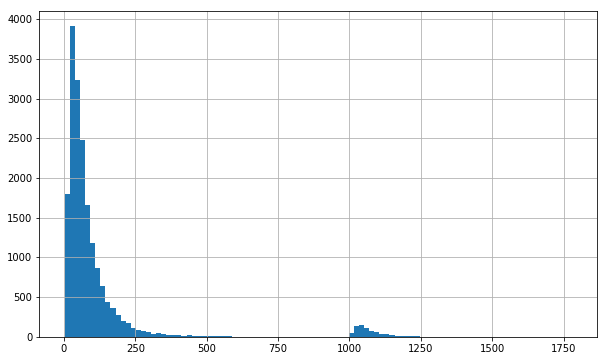

In [10]:
# continuous
df_patient['Income'].hist(bins=100)

It looks like we have an issue with our incomes! There are some outliers in this dataset...

Either we have a cluster of millionaires, or part of our data has been entered in error. 

Let's investigate further. We can calculate a number of summary statistics with describe:

In [11]:
df_patient['Income'].describe()

count    18600.000000
mean       116.674140
std        207.664735
min          3.000000
25%         34.000000
50%         59.000000
75%        104.000000
max       1780.000000
Name: Income, dtype: float64

The mean looks reasonable (57 thousand per year), but recall those outliers we saw at the top!

Actually, this distribution looks pretty reasonable using `.describe()`, we only see the outliers when we look at the histogram.

The way to calculate a histogram numerically is to calculate a series of quantiles:

In [14]:
pd.options.display.max_rows = 100

df_patient['Income']\
    .dropna()\
    .quantile(np.arange(0, 1.05, 0.05))

pd.options.display.max_rows = 10

0.00       3.0
0.05      16.0
0.10      21.0
0.15      25.0
0.20      29.0
0.25      34.0
0.30      38.0
0.35      42.0
0.40      47.0
0.45      53.0
0.50      59.0
0.55      65.0
0.60      72.0
0.65      81.0
0.70      91.0
0.75     104.0
0.80     121.0
0.85     147.0
0.90     191.0
0.95     356.0
1.00    1780.0
Name: Income, dtype: float64

How can we zoom into the upper part of this distribution? 

In [15]:
pd.options.display.max_rows = 100

df_patient['Income']\
    .dropna()\
    .quantile(np.arange(0.95, 1, 0.01))

pd.options.display.max_rows = 10

0.95     356.00
0.96     864.40
0.97    1032.00
0.98    1056.02
0.99    1094.00
1.00    1780.00
Name: Income, dtype: float64

Let's describe only the incomes above 400.

In [16]:
df_patient.loc[df_patient['Income'] > 400, 'Income'].describe()

count     878.000000
mean      986.333713
std       218.737789
min       401.000000
25%      1019.000000
50%      1047.000000
75%      1083.000000
max      1780.000000
Name: Income, dtype: float64

How about above 700?

In [17]:
df_patient.loc[df_patient['Income'] > 700, 'Income'].describe()

count     751.000000
mean     1071.011984
std        74.482740
min       707.000000
25%      1032.000000
50%      1055.000000
75%      1093.000000
max      1780.000000
Name: Income, dtype: float64

Hmm, what about above 900?

In [18]:
df_patient.loc[df_patient['Income'] > 900, 'Income'].describe()

count     743.000000
mean     1074.004038
std        68.643312
min       963.000000
25%      1032.500000
50%      1057.000000
75%      1094.000000
max      1780.000000
Name: Income, dtype: float64

It looks like we have something odd going on above 950 or 1000. We could set incomes above that to missing, or otherwise further investigate them. 

> We might have missed this data problem if we never visualized this particular column! If you only calculate basic summary statistics in your initial data examination/cleaning steps, you are not doing enough...

> Put your eyes on each variable, especially anything you will use in your reports or models. 

In [7]:
# Set Income above 1000 to be missing
df_patient.loc[df_patient['Income'] > 1000, 'Income'] = np.nan

In [20]:
df_patient['Income'].describe()

count    17858.000000
mean        76.890861
std         71.027228
min          3.000000
25%         33.000000
50%         56.000000
75%         96.000000
max        963.000000
Name: Income, dtype: float64

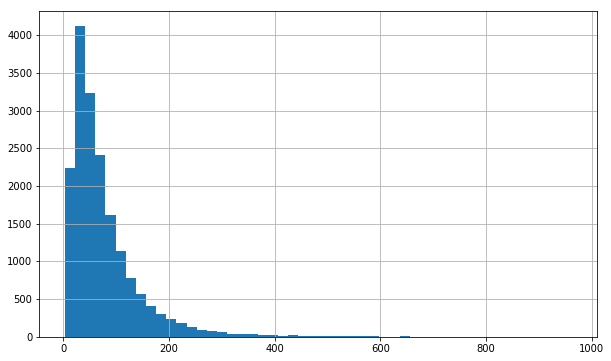

In [21]:
# Looks better!
df_patient['Income'].hist(bins=50)

## Seaborn Continuous Plots

We can use seaborn to examine distribution plots. The kernel density estimation may take longer on large data. 

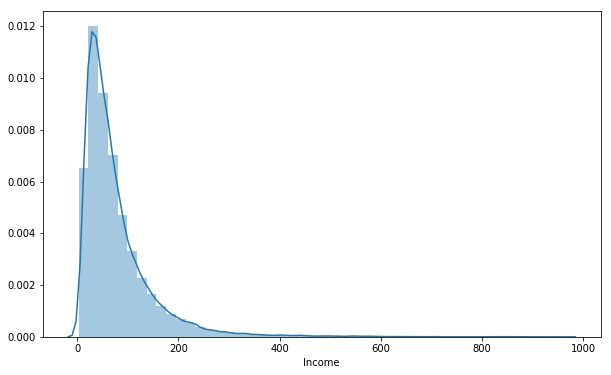

In [22]:
# Nice automatic plots in seaborn
# Must exclude missing or it will complain
sns.distplot(df_patient['Income'].dropna())

## EDA: Categories

We take a different approach to EDA for categorical data. We consider the distribution of categorical data to be the counts of the unique levels, or alternatively the observed probabilities for each level. 

Let's examine the Patient table and check the distribution of `Gender`. 

Remember, the goal is to understand the relative probabilities of each level occuring. What percent male or female is our population?

If we use the `.describe()` method, how well does that answer the question?

In [23]:
# Use the Describe Function
df_patient['Gender'].describe()

count      19426
unique         3
top       female
freq        9381
Name: Gender, dtype: object

Not very well! I prefer to use `.value_counts()` for this. 

In [24]:
# get counts by level
df_patient['Gender'].value_counts(sort=False)

MISSING    1000
male       9045
female     9381
Name: Gender, dtype: int64

You can get probabilities instead of counts like this:

In [25]:
# Get probabilities instead of counts
df_patient['Gender'].value_counts(sort=False,normalize=True)

MISSING    0.051477
male       0.465613
female     0.482910
Name: Gender, dtype: float64

And we can make a barplot of either like so:

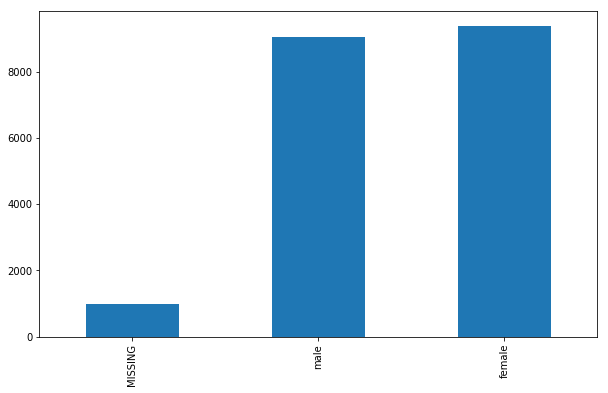

In [26]:
df_patient['Gender'].value_counts(sort=False).plot(kind='bar')

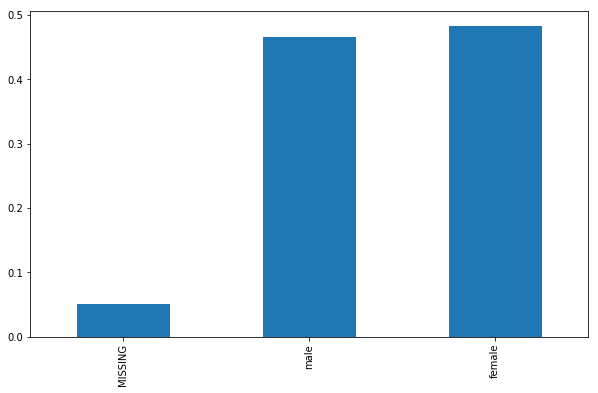

In [27]:
df_patient['Gender'].value_counts(sort=False, normalize=True).plot(kind='bar')

## Multivariate EDA: Continuous by Categorical

If we are interested in looking at the relationship between a continuous variable and a categorical variable, we look at the distribution of the continuous variable across the different levels of the categorical variable. We can do so visually, or by using a group-by analysis.

The appropriate plot here is a boxplot. 

Let's check out incomes across the different staff types.

> The question we are asking is this: Is the distribution of Income different conditional on the value of staffType?

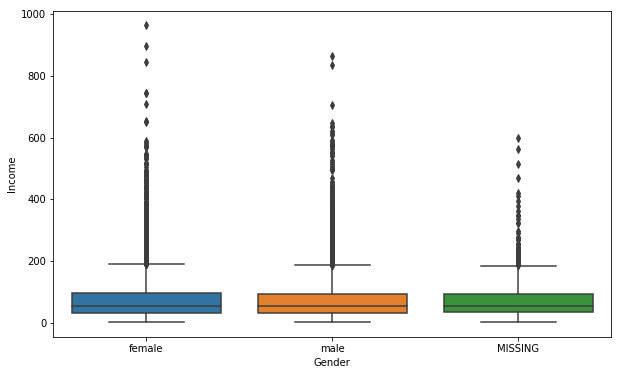

In [28]:
# Visual representation by boxplots
# What do you think?
sns.boxplot(x="Gender",
            y="Income",
            data=df_patient)

We will discuss the group-by approach later in this session. Remember this as a placeholder!
For now, we will just calculate the mean income for each gender to answer the question - does the average income depend on gender? 

In [29]:
# Mean Income for men
df_patient.loc[df_patient['Gender'] == 'male', 'Income'].mean()

# Mean Income for women
df_patient.loc[df_patient['Gender'] == 'female', 'Income'].mean()

76.5822596630327

77.19461327612919

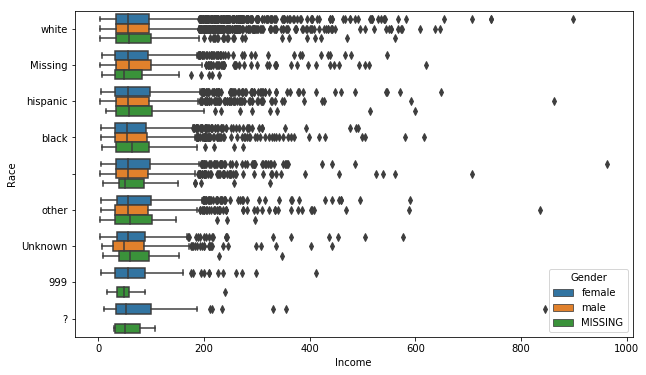

In [30]:
# add a third dimension to this plot
# Change the orientation
sns.boxplot(x="Income", 
            y="Race",
            hue='Gender',
            data=df_patient)

## Multivariate EDA: Continuous by Continuous Data

So how can we identify the relationship between two continuous variables? This is going to be the same idea as what we just went over with continuous/categorical. 

> The primary question is this: Does the distribution of one variable look different across levels of the other variable?

So what does that look like when both variables are continuous? 

We actually don't have two continuous variables in this dataset, so let's calculate the age of each patient as of 2015-01-01, and then examine the relationship between age and income in the patient data

In [8]:
# First convert to date of birth
df_patient['DateOfBirth_dt'] = pd.to_datetime(df_patient['DateOfBirth'])

# Calculate age in years as of 2015-01-01
df_patient['Age_years'] = ((pd.to_datetime('2015-01-01') - df_patient['DateOfBirth_dt']).dt.days/365.25)
df_patient['Age_years'].describe()

count    19060.000000
mean        53.368574
std         30.261082
min         15.753593
25%         32.512663
50%         49.052704
75%         65.915127
max        178.592745
Name: Age_years, dtype: float64

We can make a scatter plot of income by age:

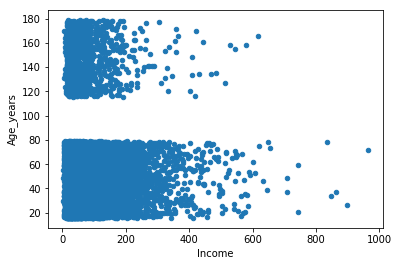

In [9]:
# cont by cont
df_patient.plot.scatter(x='Income', y='Age_years')

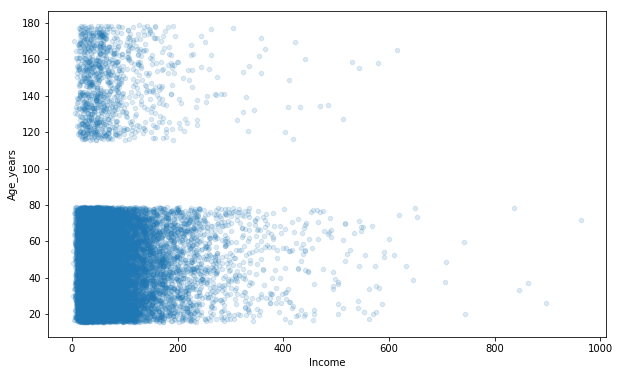

In [32]:
# Too much data! Adjust the aLpha to see better
df_patient\
    .plot\
    .scatter(x='Income',
             y='Age_years',
             alpha=0.15)

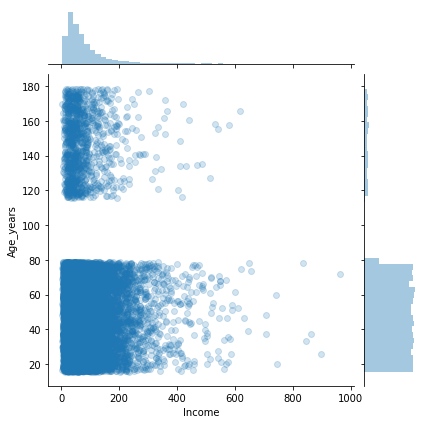

In [33]:
# Seaborn shortcut for joint plot
sns.jointplot(x="Income", 
              y="Age_years",
              data=df_patient,
              alpha=0.2)

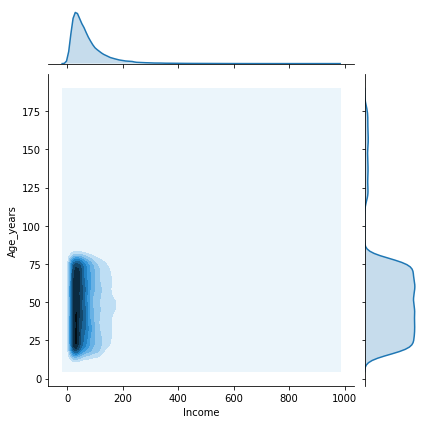

In [34]:
# Show the densities
sns.jointplot(x="Income", 
              y="Age_years",
              data=df_patient,
              kind="kde")

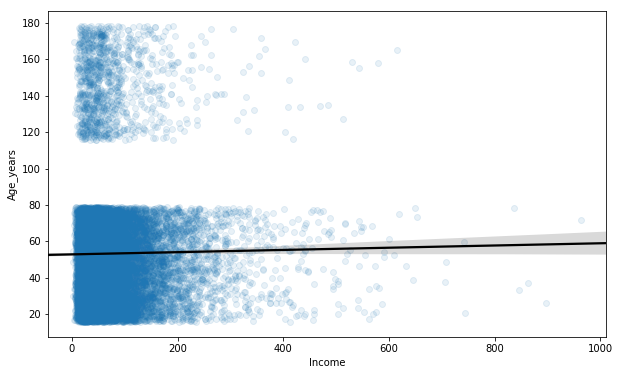

In [35]:
# Show a regression line
sns.regplot(x="Income", 
            y="Age_years",
            data=df_patient,
            scatter_kws={'alpha':0.1},
            line_kws={'color':'black'})

What is your conclusion...is there any relationship between age and income? 

## Multivariate EDA: Categorical by Categorical

Another example of pairwise data analysis is to examine if a categorical variable is related to another categorical variable. This is traditionally done by looking at frequency tables. 

We can start by looking at the overall probability of a variable taking on a specific value:

In [36]:
df_patient['Gender'].value_counts()

female     9381
male       9045
MISSING    1000
Name: Gender, dtype: int64

In [37]:
df_patient['Gender'].value_counts(normalize=True)

female     0.482910
male       0.465613
MISSING    0.051477
Name: Gender, dtype: float64

The overall probability of a person being Male in this dataset is 48%.

Do you think Gender and Race are related in this dataset? If Gender is not related to race, then the probability of being Male should be 48% across all Race categories. If there is a relationship, it will deviate from 48%.

We can check this by constructing a frequency table using the `pd.crosstab()` function. 

In [38]:
# Frequency table with counts
pd.crosstab(df_patient['Gender'], df_patient['Race'])

Race,,999,?,Missing,Unknown,black,hispanic,other,white
Gender,,,,,,,,,
MISSING,102,10,5,104,35,98,134,67,417
female,891,140,145,816,340,938,1298,690,3787
male,912,0,0,822,391,925,1267,617,3752


We can add the gender percentages by identifying the correct dimension, and adding the normalize=1 argument. 

In [39]:
pd.crosstab(df_patient['Gender'],
            df_patient['Race'],
            normalize=1)

Race,,999,?,Missing,Unknown,black,hispanic,other,white
Gender,,,,,,,,,
MISSING,0.053543,0.066667,0.033333,0.059701,0.045692,0.049975,0.049648,0.048763,0.052413
female,0.467717,0.933333,0.966667,0.468427,0.443864,0.478327,0.480919,0.502183,0.475993
male,0.478740,0.000000,0.000000,0.471871,0.510444,0.471698,0.469433,0.449054,0.471594


It looks like there is possibly a relationship between the missing Race values and Gender. Curiously, race of '999' and '?' are all females!

However, the remaining race categories seem to have similarly distributed genders.

## Group-by Analysis (Split - Apply - Combine)

Another way to identify if two variables are related to each other is to use group-by analysis, also called 'split-apply-combine'. The basic idea is that we can split the dataset apart into groups (based on a categorical variable), then apply a summary function to those groups, and combine the results. 

A simple example would be to repeat our analysis of patient mean income by gender. Let's implement that now. 

compare the statistical summaries of a continuous variable across a categorical variable is to use group-by analysis. The idea is that we split the dataframe apart into a grouped object, apply a summary statistic, then combine the results back together. Here is a simple way to get the average lab value 1 by gender:

In [40]:
# First Create a grouped object by gender
grp = df_patient.groupby('Gender')

In [41]:
# Summary statistics by group
grp.mean() 

,PatientID,ZipCode,Income,Age_years
Gender,,,,
MISSING,10127.772000,49498.741000,75.775670,53.309384
female,9956.472125,50842.202111,77.194613,53.329192
male,10032.402653,50325.868325,76.582260,53.392535


Why was PatientID and ZipCode included? Because they are numeric (floats or integers). If we made them objects, they would not be included. 

We can identify a specific variable from the grouped dataframe just like normal:

In [42]:
grp['Income'].mean()

Gender
MISSING    75.775670
female     77.194613
male       76.582260
Name: Income, dtype: float64

You can even apply a function like describe here:

In [43]:
pd.options.display.max_rows = 100
grp.describe().T

Gender                MISSING        female          male
PatientID count   1000.000000   9381.000000   9045.000000
          mean   10127.772000   9956.472125  10032.402653
          std     5760.251505   5795.416069   5741.996632
          min       21.000000      1.000000      2.000000
          25%     5298.000000   4890.000000   5089.000000
          50%     9969.500000   9923.000000  10063.000000
          75%    15034.500000  14980.000000  15018.000000
          max    19969.000000  19999.000000  20000.000000
ZipCode   count   1000.000000   9381.000000   9045.000000
          mean   49498.741000  50842.202111  50325.868325
          std    29572.743086  29185.949080  29365.709685
          min     1420.000000   1001.000000    758.000000
          25%    27223.750000  27834.000000  27407.000000
          50%    47952.000000  48607.000000  48108.000000
          75%    75846.000000  77002.000000  76710.000000
          max    99701.000000  99922.000000  99801.000000
Income    count    896.000000   8391.000000   8072.000000
          mean      75.775670     77.194613     76.582260
          std       68.153867     71.964283     70.501476
          min        3.000000      4.000000      3.000000
          25%       33.750000     33.000000     32.750000
          50%       56.000000     56.000000     56.000000
          75%       95.000000     96.000000     95.000000
          max      600.000000    963.000000    863.000000
Age_years count    947.000000   8967.000000   8601.000000
          mean      53.309384     53.329192     53.392535
          std       29.979914     29.971492     30.550162
          min       15.882272     15.756331     15.753593
          25%       33.404517     32.510609     32.517454
          50%       48.640657     49.300479     48.889802
          75%       65.997262     65.941136     65.765914
          max      178.461328    178.592745    178.214921

In [44]:
pd.options.display.max_rows = 10

## Group By Iteration

The actual group by object here is iterable. If we iterate through the object, it will yield a tuple with the name and the group.

In [45]:
## iteration through groups
for name, group in grp:
    print(name)
    print(group)

MISSING
       PatientID  FirstName  LastName State  ZipCode DateOfBirth   Gender  \
20            21       Ruby  McAlpine    MI    48607  1995-05-23  MISSING   
38            39     Donald     McCoy    LA    70006  1942-01-28  MISSING   
47            48  Guillermo       Fox    WI    54913  1987-10-19  MISSING   
49            50    Kenneth     Smyth    OH    43066  1985-02-24  MISSING   
58            59       John     Diego    CA    94612         NaN  MISSING   
...          ...        ...       ...   ...      ...         ...      ...   
19896      19897    Melanie     Boyes    TX    75201  1947-12-02  MISSING   
19898      19899     Tamara      King    MA     2421  1957-05-25  MISSING   
19929      19930     Amanda    Bolden    CO    80904  1954-09-21  MISSING   
19964      19965        Joe      Teel    FL    32084  1969-03-25  MISSING   
19968      19969    Stanley     Berry    CA    95814  1994-11-01  MISSING   

           Race  Income DateOfBirth_dt  Age_years  
20        white

In [46]:
## You can select a groups data with get_group
grp.get_group('male')

,PatientID,FirstName,LastName,State,ZipCode,DateOfBirth,Gender,Race,Income,DateOfBirth_dt,Age_years
1,2,Todd,Rea,TX,79602,1936-12-20,male,Missing,NaN,1936-12-20,78.031485
4,5,Glenn,Labrecque,NM,87102,1985-08-19,male,Missing,48.0,1985-08-19,29.368925
6,7,Timothy,Allison,CT,6450,1888-04-08,male,black,60.0,1888-04-08,126.729637
8,9,William,Fontenot,OH,45402,1938-04-24,male,,NaN,1938-04-24,76.689938
11,12,Thomas,Dvorak,CT,6103,1966-11-06,male,white,22.0,1966-11-06,48.153320
...,...,...,...,...,...,...,...,...,...,...,...
19993,19994,James,Devault,OH,44902,1986-09-06,male,black,33.0,1986-09-06,28.320329
19994,19995,Ronald,Henry,NJ,8060,1957-05-09,male,black,54.0,1957-05-09,57.648186
19996,19997,Wilfredo,Reinhardt,CO,80112,1950-02-23,male,other,31.0,1950-02-23,64.854209
19997,19998,Thanh,Large,FL,33912,1957-11-24,male,black,60.0,1957-11-24,57.103354


## Multiple Group-by

We can select multiple variables to be in the group-by statement by simply adding them into the group_by function.

In [47]:
pd.options.display.max_rows = 20

## Multivariate groups
grp = df_patient.groupby(['Gender', 'Race'])
res1 = grp['Income'].mean()
res1

pd.options.display.max_rows = 10

Gender   Race    
MISSING              68.967742
         999         65.000000
         ?           59.750000
         Missing     61.612903
         Unknown     79.352941
         black       75.755814
         hispanic    84.066667
         other       72.491228
         white       78.420912
female               78.050063
                       ...    
         hispanic    77.993097
         other       80.008157
         white       77.700855
male                 75.368039
         Missing     79.602981
         Unknown     67.797143
         black       76.720787
         hispanic    75.708738
         other       79.106115
         white       77.228606
Name: Income, Length: 25, dtype: float64

Now that we have the calculations we want, we can make this more presentable by unstacking one of the row indices into the column. 

In [48]:
## Unstack the index to the columns
res1.unstack(level='Gender')

Gender,MISSING,female,male
Race,,,
,68.967742,78.050063,75.368039
999,65.000000,75.968992,NaN
?,59.750000,80.458015,NaN
Missing,61.612903,75.328748,79.602981
Unknown,79.352941,74.643098,67.797143
black,75.755814,72.893491,76.720787
hispanic,84.066667,77.993097,75.708738
other,72.491228,80.008157,79.106115
white,78.420912,77.700855,77.228606


## Pivot

A different way of achieving the same goal would be to take the information out of the index and into the dataframe as a column, then 'pivot' the table accordingly.

In [49]:
## Reset the index to recover variable names directly
res1.reset_index()

,Gender,Race,Income
0,MISSING,,68.967742
1,MISSING,999,65.000000
2,MISSING,?,59.750000
3,MISSING,Missing,61.612903
4,MISSING,Unknown,79.352941
...,...,...,...
20,male,Unknown,67.797143
21,male,black,76.720787
22,male,hispanic,75.708738
23,male,other,79.106115


In [50]:
## Can also use the column names instead of indices
res1.reset_index().pivot(index='Gender', columns='Race') 

Income                                                         \
Race                      999          ?    Missing    Unknown      black   
Gender                                                                      
MISSING  68.967742  65.000000  59.750000  61.612903  79.352941  75.755814   
female   78.050063  75.968992  80.458015  75.328748  74.643098  72.893491   
male     75.368039        NaN        NaN  79.602981  67.797143  76.720787   

                                          
Race      hispanic      other      white  
Gender                                    
MISSING  84.066667  72.491228  78.420912  
female   77.993097  80.008157  77.700855  
male     75.708738  79.106115  77.228606

## Saving Tables as Excel Files

Now that we have created a table of results, we may wish to export this as an excel file. We can easily do this using the `to_excel()` method of a dataframe. 

In [51]:
res2 = res1.reset_index().pivot(index='Gender', columns='Race') 

In [52]:
res2.to_excel('gender_by_income.xlsx')

## Long and Wide Data, Melt and Cast

We will now start to think about long versus wide data, and the corresponding melt and cast functionality in pandas. 

When we have data collected across a cluster, we can store it as long or wide data. One example would be collecting multiple patient surveys over time. If you had collected multiple surveys (measurements) over three time points, how could you store that data? 

Here is a visual for two options (long or wide):

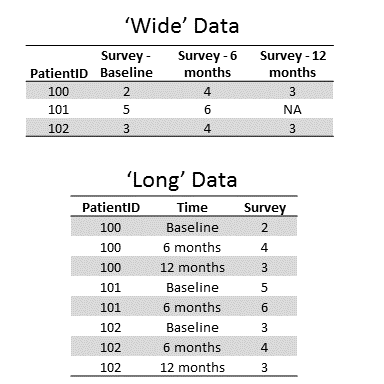

In [53]:
from IPython.display import Image
Image(filename='common/long_wide.png')

Now consider our outpatientVisit table. Is this table long or wide? 

In [54]:
df_OutpatVisit

,VisitID,StaffID,PatientID,VisitDate,ICD10_1,ICD10_2,ICD10_3,ClinicCode
0,1,24,1,2011-08-05,G801,NaN,NaN,7
1,2,13,1,2013-06-15,G801,NaN,NaN,49
2,3,36,1,2013-12-28,G801,NaN,NaN,42
3,4,14,1,2014-10-21,G801,NaN,NaN,29
4,5,45,1,2015-05-11,G801,NaN,NaN,21
...,...,...,...,...,...,...,...,...
181391,181392,44,20000,2011-08-26,E1322,NaN,NaN,17
181392,181393,28,20000,2012-01-05,E1322,NaN,NaN,57
181393,181394,32,20000,2012-01-23,E1322,NaN,NaN,15
181394,181395,38,20000,2012-05-10,E1322,NaN,NaN,1


I think the correct answer is 'it depends'. 
* This table is 'long' with respect to patient visits. Each new patient visit is a new row in the table. 
* This table is 'wide' with respect to the ICD column, which is the diagnosis code indicator (reason for the visit)

Do you see the difference? 

Let's start by treating this data as 'long', and do some summaries. 

What if I wanted to know how many visits each patient had per year? Perhaps I could then calculate the max number of visits for any patient in any given year?

First, I need to summarize the total number of visits per patient. We could do this with the group-by statements from above, but we can also do it through pivoting the table and performing a summary. 

We use the `.pivot_table()` method to move a file from long up to wide, optionally applying a summary statistic:

In [13]:
# Create the year variable from visit date
df_OutpatVisit['VisitDate_dt'] = \
    pd.to_datetime(df_OutpatVisit['VisitDate'])

df_OutpatVisit['Visit_year'] = \
    df_OutpatVisit['VisitDate_dt'].dt.year

# Perform the described pivot
df_OutpatVisit\
    .pivot_table(values='VisitID',
                 index='PatientID',
                 columns='Visit_year',
                 aggfunc=len,
                 fill_value=0)

Visit_year,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
PatientID,,,,,,,,,,,,,,
1,0,0,0,0,0,0,1,0,2,1,3,4,1,1
2,0,0,0,0,0,0,0,0,0,0,0,2,2,0
3,0,0,0,0,0,0,0,1,2,5,1,4,2,0
4,0,0,0,0,0,0,2,1,0,0,0,0,0,0
5,0,1,2,0,0,1,1,2,0,0,1,1,1,0
7,0,2,0,1,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,1,2,1,3,0
9,0,0,0,0,1,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,3,6,1,0


In [56]:
# Perform the described pivot and calculate max per year
df_OutpatVisit\
    .pivot_table(values='VisitID',
                 index='PatientID',
                 columns='Visit_year',
                 aggfunc=len,
                 fill_value=0)\
    .max()

Visit_year
2005.0     8
2006.0    11
2007.0    10
2008.0    10
2009.0    11
          ..
2014.0    13
2015.0    10
2016.0    12
2017.0    11
2018.0     7
Length: 14, dtype: int64

What about the disease codes in this table (the ICD Columns)?  Those are in a wide format. We actually need to merge in lookup file to help translate these ICD Codes. For example, the ICD Code 'O1093' indicates the patient was diagnosed with Hypertension. 

There is a disease to ICD code map file in the healthcare data folder. We can use this and merge the ICD codes to the diseases to understand when a patient was diagnosed with diseases. 

Prior to merging in the code definitions, we should put all those ICDCodes into a single column (instead of three columns). Then we will only have to merge the data once!

We can do this by taking the 'wide' file (with respect to the ICD columns), and 'melting' it down to a long column. 

In [57]:
df_patientICD_long = \
    pd.melt(df_OutpatVisit[['PatientID','VisitDate','ICD10_1','ICD10_2','ICD10_3']],
            id_vars=['PatientID','VisitDate'],
            value_name='ICDCode',
            var_name='ICDPosition')

df_patientICD_long

,PatientID,VisitDate,ICDPosition,ICDCode
0,1,2011-08-05,ICD10_1,G801
1,1,2013-06-15,ICD10_1,G801
2,1,2013-12-28,ICD10_1,G801
3,1,2014-10-21,ICD10_1,G801
4,1,2015-05-11,ICD10_1,G801
...,...,...,...,...
544183,20000,2011-08-26,ICD10_3,NaN
544184,20000,2012-01-05,ICD10_3,NaN
544185,20000,2012-01-23,ICD10_3,NaN
544186,20000,2012-05-10,ICD10_3,NaN


We could now merge the disease map file, then use the pivot table functionality to identify which patient's have been diagnosed with certain diseases!

In [58]:
# Import Disease Map
df_DiseaseMap = pd.read_csv("data/Data_Sims/healthcare/DiseaseMap.csv")
df_DiseaseMap.dropna()

,DiseaseMapID,ICD10,Condition
0,3692,F1010,Alcohol
1,3693,F10120,Alcohol
2,3694,F10121,Alcohol
3,3695,F10129,Alcohol
4,3696,F1014,Alcohol
...,...,...,...
3731,925,I69990,Stroke
3732,926,I69991,Stroke
3733,927,I69992,Stroke
3734,928,I69993,Stroke


In [59]:
# Merge to our 'long' file
df_temp = \
    pd.merge(left=df_patientICD_long,
             right=df_DiseaseMap.dropna(),
             how='left',
             left_on='ICDCode',
             right_on='ICD10')
df_temp

,PatientID,VisitDate,ICDPosition,ICDCode,DiseaseMapID,ICD10,Condition
0,1,2011-08-05,ICD10_1,G801,1954.0,G801,Paralysis
1,1,2013-06-15,ICD10_1,G801,1954.0,G801,Paralysis
2,1,2013-12-28,ICD10_1,G801,1954.0,G801,Paralysis
3,1,2014-10-21,ICD10_1,G801,1954.0,G801,Paralysis
4,1,2015-05-11,ICD10_1,G801,1954.0,G801,Paralysis
...,...,...,...,...,...,...,...
544183,20000,2011-08-26,ICD10_3,NaN,NaN,NaN,NaN
544184,20000,2012-01-05,ICD10_3,NaN,NaN,NaN,NaN
544185,20000,2012-01-23,ICD10_3,NaN,NaN,NaN,NaN
544186,20000,2012-05-10,ICD10_3,NaN,NaN,NaN,NaN


We can use pivot table and the len (length) function to count the number of rows for each combination of PatientID and Condition using the code below:

In [60]:
# Pivot Up to Count Diagnoses by Patient and condition
df_temp.pivot_table(values='ICDPosition',
                    index='PatientID',
                    columns='Condition',
                    aggfunc=len,
                    fill_value=0)

Condition,Alcohol,Cancer,Congestive_heart_failure,Dementia,Depression,Diabetes_with_complications,Diabetes_without_complications,Drugs,HIV,Hypertension,...,Metastatic_solid_tumour,Myocardial_infarction,Obesity,Paralysis,Peptic_ulcer_disease,Peripheral_vascular_disease,Pulmonary,Renal,Rheumatic,Stroke
PatientID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,13,0,0,0,0,0,0
2,0,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,15,0,15,0,0,0,0,0,15,0
4,0,3,0,0,3,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,10,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,0,0,0,0,0,0,0,0,0,0,...,4,0,0,4,0,0,0,0,0,4
19997,0,0,0,0,0,0,0,0,20,0,...,0,0,0,20,0,0,0,0,0,0
19998,8,8,0,0,0,0,0,0,0,0,...,0,0,0,8,0,0,0,0,0,0
